In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import tensorflow as tf 
import numpy as np
import os
import matplotlib.pyplot as plt 

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

rawdir = listdir_nohidden('/content/drive/MyDrive/301data/FERG_DB_256_reduced')
Name = sorted(rawdir)
n = len(Name)
N = list(range(n))
string_to_num_mapping = dict(zip(Name,N)) 
num_to_string_mapping = dict(zip(N,Name)) 
string_to_num_mapping

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'joy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

Found 5322 images belonging to 7 classes.
Found 2277 images belonging to 7 classes.


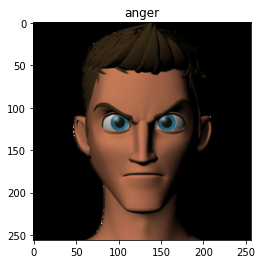

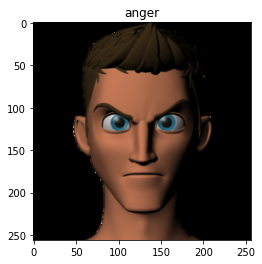

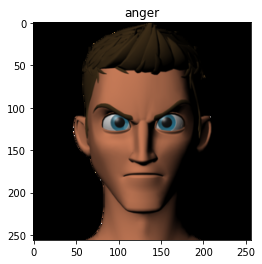

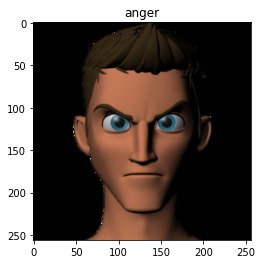

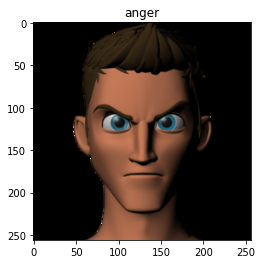

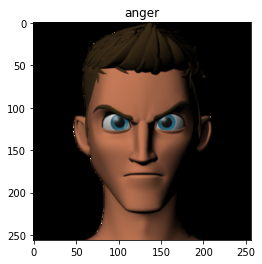

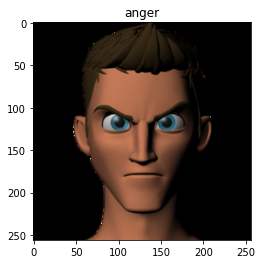

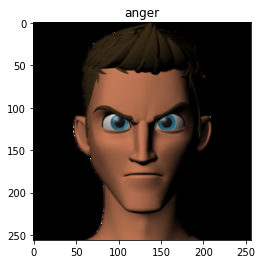

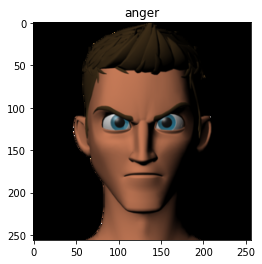

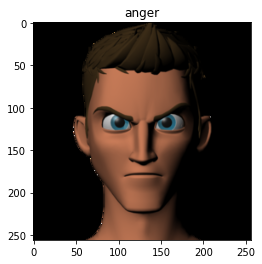

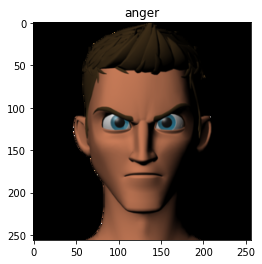

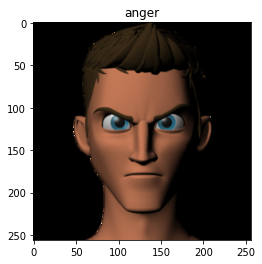

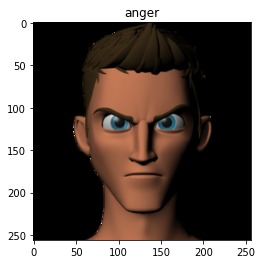

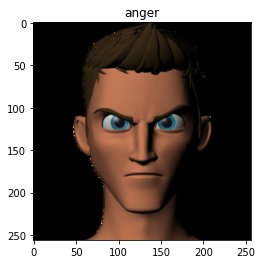

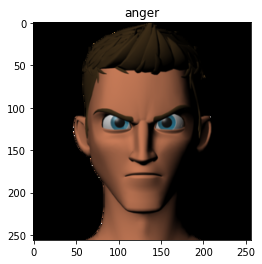

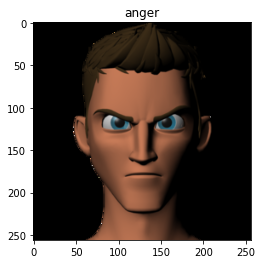

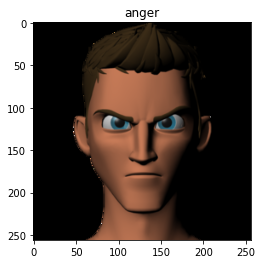

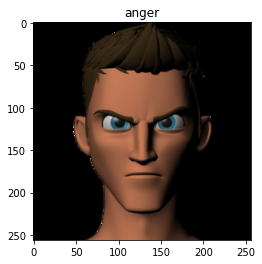

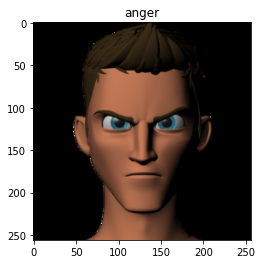

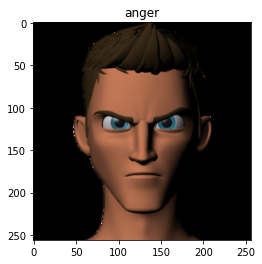

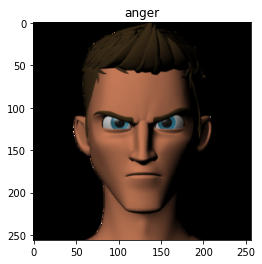

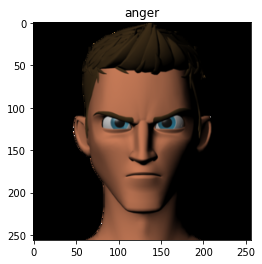

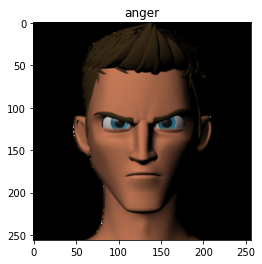

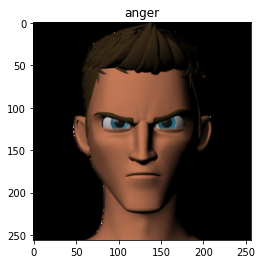

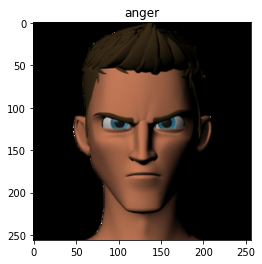

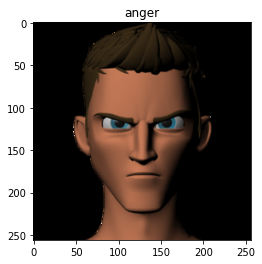

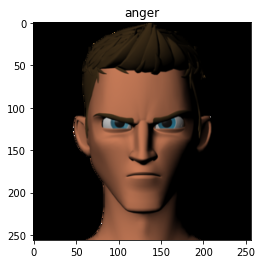

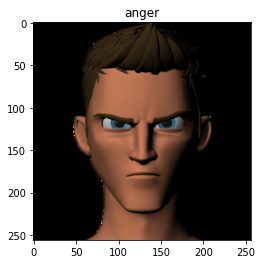

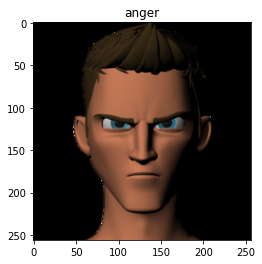

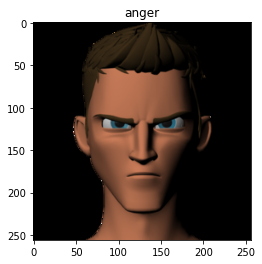

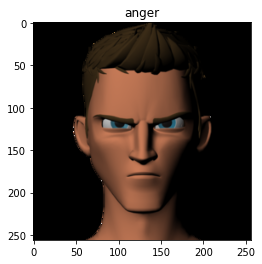

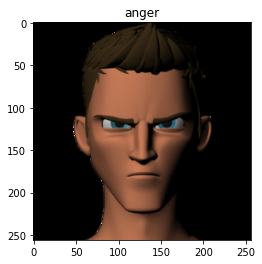

In [49]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.3,
    rescale=1./256)
root_dir = '/content/drive/MyDrive/301data/FERG_DB_256_reduced'

img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(256,256),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical',
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(256,256),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical',
    subset="validation")


imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
  value=np.argmax(label)
  plt.imshow(img)
  plt.title(num_to_string_mapping[value])
  plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 230400)           

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [52]:
history = model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, epochs=30) 

Epoch 1/30
167/167 [==============================] - 656s 4s/step - loss: 1.8289 - categorical_accuracy: 0.2815 - val_loss: 1.7475 - val_categorical_accuracy: 0.2082
Epoch 2/30
167/167 [==============================] - 31s 184ms/step - loss: 1.1684 - categorical_accuracy: 0.6513 - val_loss: 1.9306 - val_categorical_accuracy: 0.4985
Epoch 3/30
167/167 [==============================] - 31s 184ms/step - loss: 0.4699 - categorical_accuracy: 0.8474 - val_loss: 2.0091 - val_categorical_accuracy: 0.5599
Epoch 4/30
167/167 [==============================] - 31s 184ms/step - loss: 0.1622 - categorical_accuracy: 0.9540 - val_loss: 2.1954 - val_categorical_accuracy: 0.6706
Epoch 5/30
167/167 [==============================] - 31s 185ms/step - loss: 0.1023 - categorical_accuracy: 0.9617 - val_loss: 2.4305 - val_categorical_accuracy: 0.6465
Epoch 6/30
167/167 [==============================] - 31s 185ms/step - loss: 0.0408 - categorical_accuracy: 0.9848 - val_loss: 2.7400 - val_categorical_accur

In [61]:
np.mean(history.history['val_categorical_accuracy']), np.max(history.history['val_categorical_accuracy'])

(0.681510769824187, 0.7184892296791077)

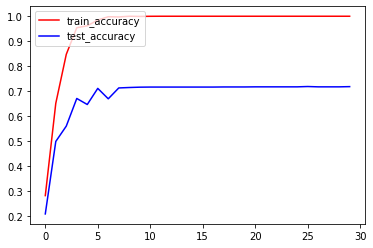

In [57]:
plt.plot(history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [59]:
imgs, labels = next(iter(img_generator_flow_valid))

preds = model.predict(imgs)
pred_labels = tf.argmax(preds, axis = -1)

LABEL = []
for item in labels:
    LABEL += [np.argmax(item)]
print(LABEL)

PRED = pred_labels.numpy().tolist()

from sklearn.metrics import classification_report
print(classification_report(LABEL, PRED))

1/1 [==============================] - 0s 33ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      32.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00      32.0
   macro avg       0.00      0.00      0.00      32.0
weighted avg       0.00      0.00      0.00      32.0



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1